In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load dataset
columns = ['Year'] + [f'Feature_{i}' for i in range(1, 91)]
df = pd.read_csv('data/YearPredictionMSD.txt', header=None, names=columns)

print("Shape:", df.shape)
df.head()


Shape: (515345, 91)


,Year,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_81,Feature_82,Feature_83,Feature_84,Feature_85,Feature_86,Feature_87,Feature_88,Feature_89,Feature_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [2]:
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype(int).astype(str) + 's'
df['Decade'].value_counts().sort_index()


Decade
1920s       224
1930s       252
1940s       356
1950s      3102
1960s     11739
1970s     24745
1980s     41814
1990s    124713
2000s    299003
2010s      9397
Name: count, dtype: int64

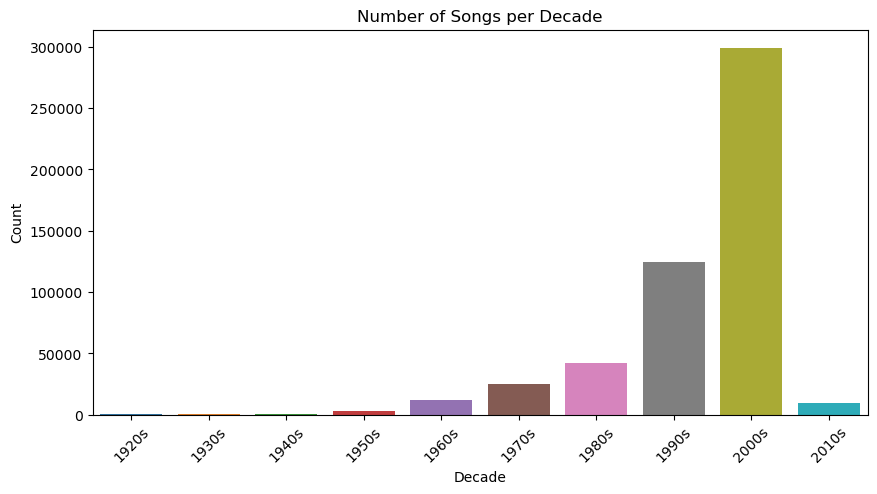

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Decade', data=df, order=sorted(df['Decade'].unique()))
plt.title('Number of Songs per Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


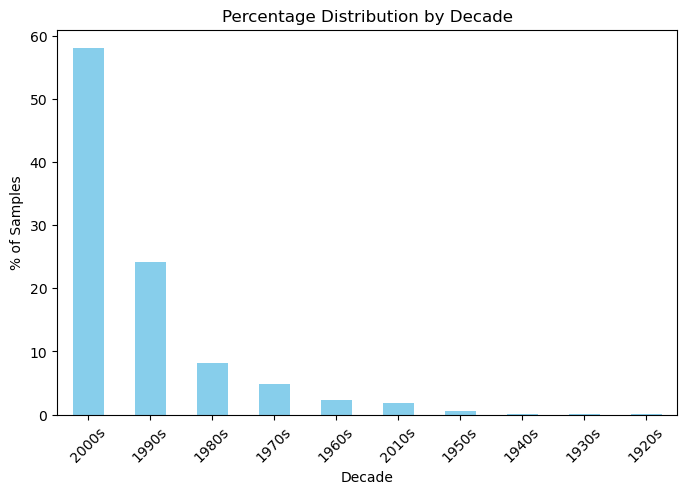

In [4]:
decade_dist = df['Decade'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
decade_dist.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution by Decade')
plt.ylabel('% of Samples')
plt.xticks(rotation=45)
plt.show()


In [5]:
df.describe().T.iloc[:10, :]  # First 10 features only for display


,count,mean,std,min,25%,50%,75%,max
Year,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
Feature_1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
Feature_2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
Feature_3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
Feature_4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
Feature_5,515345.0,-6.553601,22.860785,-181.95337,-20.66645,-6.00777,7.74187,262.06887
Feature_6,515345.0,-9.521975,12.857751,-81.79429,-18.44099,-11.18839,-2.38896,166.23689
Feature_7,515345.0,-2.391089,14.571873,-188.21400,-10.78060,-2.04667,6.50858,172.40268
Feature_8,515345.0,-1.793236,7.963827,-72.50385,-6.46842,-1.73645,2.91345,126.74127
Feature_9,515345.0,3.727876,10.582861,-126.47904,-2.29366,3.82231,9.96182,146.29795


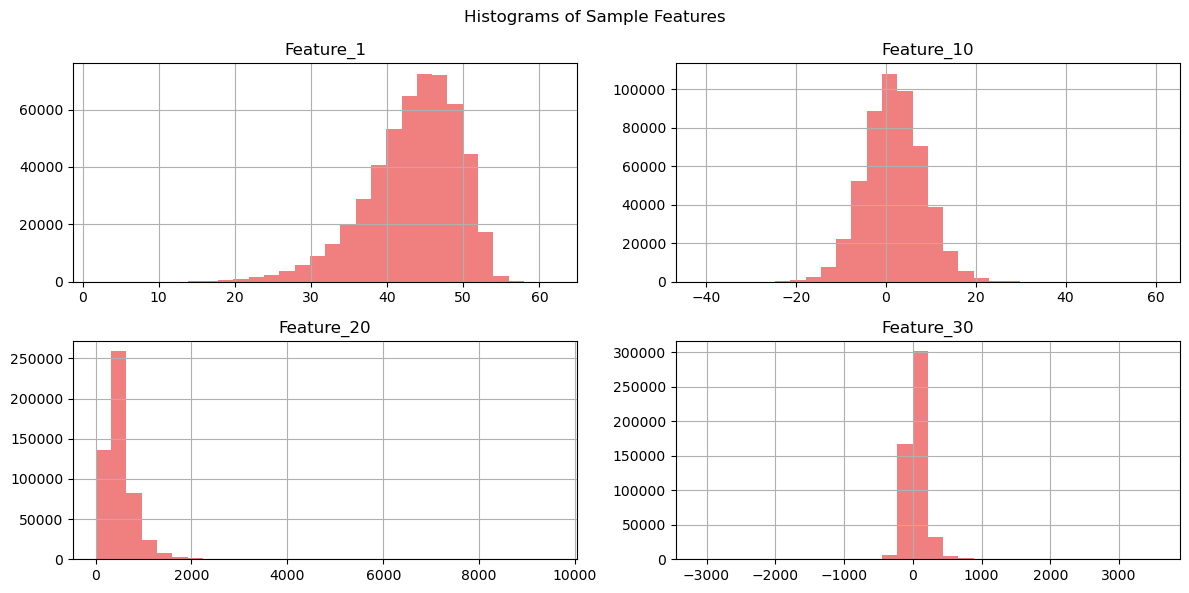

In [6]:
sample_features = ['Feature_1', 'Feature_10', 'Feature_20', 'Feature_30']
df[sample_features].hist(figsize=(12, 6), bins=30, color='lightcoral')
plt.suptitle("Histograms of Sample Features")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Decade', y='Feature_1', data=df)
plt.title("Boxplot of Feature_1 by Decade")
plt.xticks(rotation=45)
plt.show()
